<a href="https://colab.research.google.com/github/carlafalcone93/ProyectoFinalFalconeCarlaLuciana/blob/main/ProyectoFinalFalconeCarlaLuciana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Abstracto**
## **Motivación:** El análisis de la efectividad de estrategias de precios en la industria hotelera es crucial para maximizar los ingresos y la ocupación. Los precios de las habitaciones pueden verse afectados por la temporada, la demanda y otros factores externos como eventos especiales. Este análisis busca determinar cómo las políticas de precios influyen en las reservas y cómo se pueden optimizar para mejorar la rentabilidad del hotel.

## **Audiencia:** Este análisis es útil para los gerentes de hoteles, cadenas hoteleras, consultores de turismo y plataformas de reserva de hoteles. El objetivo es proporcionar herramientas y recomendaciones para optimizar la estrategia de precios y mejorar la competitividad en el mercado.

# **2. Importación, limpieza y transformación de datos**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style="whitegrid")

# Cargar el dataset
df = pd.read_csv('hotel_bookings.csv')

# Mapeo de meses a números
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month_num'] = df['arrival_date_month'].map(month_map)

# Crear columna de fecha completa
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month_num'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str)
)

# Crear columna con día de la semana
df['arrival_day_of_week'] = df['arrival_date'].dt.day_name()

# Filtrar outliers en ADR
df = df[df['adr'] > 0]

# Vista rápida del dataset
print(f"Dimensiones del dataset: {df.shape}")
df.head()


Dimensiones del dataset: (117430, 35)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,arrival_day_of_week
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,Wednesday
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,Wednesday
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,7,2015-07-01,Wednesday


#**PREGUNTAS, HIPOTESIS Y CONCLUSIONES**

# ¿Cuál es la distribución de precios por noche (ADR)?
## Hipótesis: La mayoría de las reservas se concentran en tarifas moderadas, pero existen valores atípicos de precios muy altos.

## Conclusión:

- La mayoría de los precios se concentran entre 0 y 200.

- Existen valores atípicos con tarifas por noche muy altas, pero son poco frecuentes.

- Esto confirma que hay una alta concentración de tarifas económicas a moderadas.

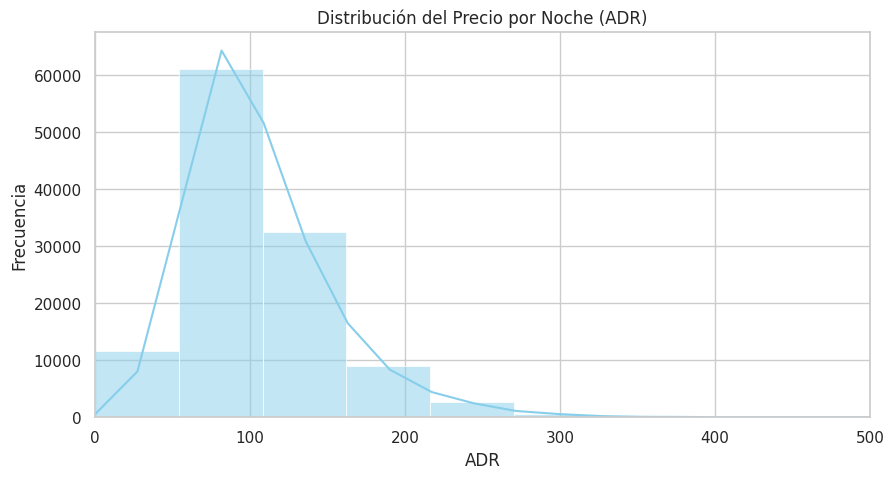

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['adr'], bins=100, kde=True, color='skyblue')
plt.xlim(0, 500)  # Limitar visualmente los valores atípicos
plt.title('Distribución del Precio por Noche (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.show()


# ¿Cómo varía el ADR promedio a lo largo del año?

## Hipótesis: Hay mayor ADR en los meses de temporada alta como verano y vacaciones.

## Conclusión:

- Se observan picos en meses como junio, julio y agosto, lo cual coincide con temporada alta (verano europeo).

- Esto valida la hipótesis de que los precios fluctúan estacionalmente.

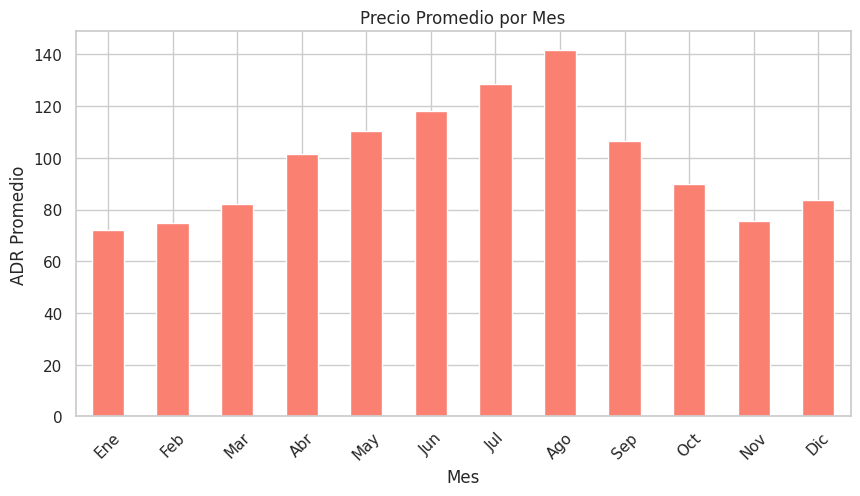

In [35]:
monthly_adr = df.groupby('arrival_date_month_num')['adr'].mean().sort_index()

plt.figure(figsize=(10, 5))
monthly_adr.plot(kind='bar', color='salmon')
plt.title('Precio Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('ADR Promedio')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                                       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.show()


# ¿Qué tipo de hotel (urbano o resort) tiene mayores precios?

## Hipótesis: Los hoteles tipo Resort tienen un ADR más alto que los urbanos.

## Conclusión:

- El tipo Resort Hotel tiene una distribución más amplia y con valores más altos de ADR.

- El City Hotel muestra precios más moderados y estables.

- Se confirma que los resorts tienden a cobrar más por noche.

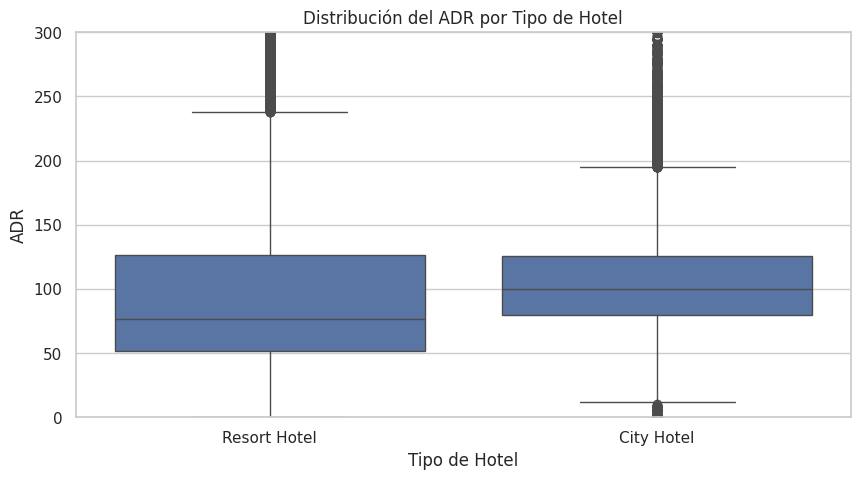

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Distribución del ADR por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('ADR')
plt.ylim(0, 300)
plt.show()


# ¿Qué días de la semana tienen más reservas?

## Hipótesis: Las reservas aumentan durante los fines de semana, especialmente viernes y sábado.

## Conclusión:

- Se observa un incremento claro a partir del Jueves hasta el Sábado.

- Si bien coincide con la lógica de mayor ocupación durante fines de semana, se observa que los Domingos hay una gran caída en las reservas, y los Lunes aumenta.

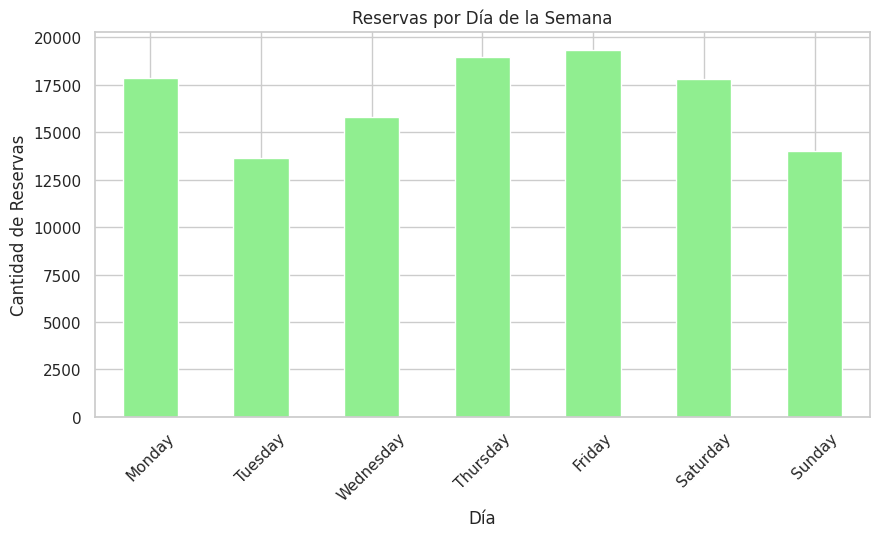

In [37]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['is_reserved'] = 1  # Todas las filas representan reservas efectivas

weekly_bookings = df.groupby('arrival_day_of_week')['is_reserved'].count().reindex(order)

plt.figure(figsize=(10, 5))
weekly_bookings.plot(kind='bar', color='lightgreen')
plt.title('Reservas por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de Reservas')
plt.xticks(rotation=45)
plt.show()
